In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_rome_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('rome')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/rome_{date}.csv',index=False)
get_listings_rome_timeseries()

In [3]:
# pull in detailed_listings
raw_df_rome = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_rome)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(rome_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 25489 AirBnb listings.


In [4]:
rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
rome_raw_df_12_12_2020.shape





(28151, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for rome
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_rome = glob.glob('rome/**.csv')
files_rome

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['rome/Rome_2021-01.csv',
 'rome/Rome_2021-02.csv',
 'rome/Rome_2021-03.csv',
 'rome/Rome_2021-07.csv',
 'rome/Rome_2021-06.csv',
 'rome/Rome_2021-04.csv',
 'rome/Rome_2021-10.csv',
 'rome/Rome_2021-08.csv',
 'rome/Rome_2021-09.csv',
 'rome/Rome_2020-12.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(rome_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(rome_raw_df_12_12_2020['price'].mean(),2)}.")

rome_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(rome_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_1_9_2021['price'].mean(),2)}.")

rome_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(rome_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_2_8_2021['price'].mean(),2)}.")

rome_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(rome_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_3_4_2021['price'].mean(),2)}.")

rome_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(rome_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_4_9_2021['price'].mean(),2)}.")

#rome_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(rome_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_5_19_2021['price'].mean(),2)}.")

rome_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(rome_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_6_3_2021['price'].mean(),2)}.")

rome_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(rome_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_7_4_2021['price'].mean(),2)}.")

rome_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(rome_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_8_6_2021['price'].mean(),2)}.")

rome_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(rome_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_9_7_2021['price'].mean(),2)}.")

rome_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(rome_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_10_6_2021['price'].mean(),2)}.")

#rome_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(rome_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 28151 AirBnb listings; the avg price is €108.71.
The 1_9_2021 dataset contains 28024 AirBnb listings; the avg price is €105.14.
The 2_8_2021 dataset contains 27647 AirBnb listings; the avg price is €105.11.
The 3_4_2021 dataset contains 27433 AirBnb listings; the avg price is €109.61.
The 4_9_2021 dataset contains 27518 AirBnb listings; the avg price is €113.53.
The 6_3_2021 dataset contains 27126 AirBnb listings; the avg price is €116.16.
The 7_4_2021 dataset contains 27213 AirBnb listings; the avg price is €120.82.
The 8_6_2021 dataset contains 26877 AirBnb listings; the avg price is €122.9.
The 9_7_2021 dataset contains 26098 AirBnb listings; the avg price is €123.84.
The 10_6_2021 dataset contains 25490 AirBnb listings; the avg price is €127.01.


In [8]:
df_list_rome = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021,
           rome_raw_df_3_4_2021, rome_raw_df_4_9_2021,  rome_raw_df_6_3_2021, rome_raw_df_7_4_2021,
           rome_raw_df_8_6_2021, rome_raw_df_9_7_2021, rome_raw_df_10_6_2021]

dates_rome = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_rome = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_rome = []

def airbnb_parse_rome(df_list, files):
    for file in files_rome:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_{file}.csv")
        print(f"The {file} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_rome(df_list, dates):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_{file}.csv")
        #print(f"The {date} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_rome.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_rome)

rome_parse = airbnb_parse_rome(df_list_rome, files_rome)


The 2020-12 rome dataset contains 28151 AirBnb listings -- the avg price is €108.71.
The 2021-01 rome dataset contains 28024 AirBnb listings -- the avg price is €105.14.
The 2021-02 rome dataset contains 27647 AirBnb listings -- the avg price is €105.11.
The 2021-03 rome dataset contains 27433 AirBnb listings -- the avg price is €109.61.
The 2021-04 rome dataset contains 27518 AirBnb listings -- the avg price is €113.53.
The 2021-06 rome dataset contains 27126 AirBnb listings -- the avg price is €116.16.
The 2021-07 rome dataset contains 27213 AirBnb listings -- the avg price is €120.82.
The 2021-08 rome dataset contains 26877 AirBnb listings -- the avg price is €122.9.
The 2021-09 rome dataset contains 26098 AirBnb listings -- the avg price is €123.84.
The 2021-10 rome dataset contains 25490 AirBnb listings -- the avg price is €127.01.


In [9]:
rome_summary = airbnb_to_frame_rome(df_list_rome, files_rome)
rome_summary['Date of scrape'] = pd.to_datetime(rome_summary['Date of scrape'])
rome_summary['City'] = 'Rome'
rome_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,28151,108.71,70.0,0,10571,1.15,Rome
1,2021-01-01,28024,105.14,65.0,0,10571,1.12,Rome
2,2021-02-01,27647,105.11,65.0,0,10571,1.09,Rome
3,2021-03-01,27433,109.61,69.0,0,10571,1.07,Rome
4,2021-04-01,27518,113.53,70.0,0,10571,1.03,Rome
5,2021-06-01,27126,116.16,73.0,0,10571,1.04,Rome
6,2021-07-01,27213,120.82,75.0,0,10571,1.06,Rome
7,2021-08-01,26877,122.90,75.0,0,10571,1.13,Rome
8,2021-09-01,26098,123.84,79.0,0,15400,1.18,Rome
9,2021-10-01,25490,127.01,80.0,0,11111,1.23,Rome


<AxesSubplot:xlabel='Date of scrape'>

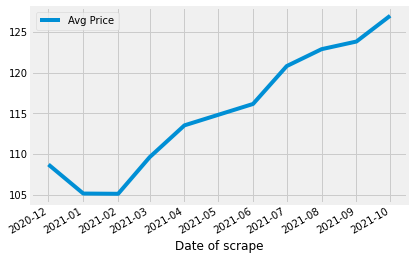

In [10]:
rome_summary.plot(x='Date of scrape', y='Avg Price')

In [11]:
master_df_rome = pd.concat(df_list_rome)
master_df_rome_unique = master_df_rome.drop_duplicates(subset='id')
master_df_rome_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,21,7,7,2015-05-28,0.10,5,365,NaN,NaN
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,37,1,55,2017-10-31,0.37,3,365,NaN,NaN
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3,17,2018-10-01,0.14,7,365,NaN,NaN
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2,142,2020-01-03,1.21,1,364,NaN,NaN
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2,40,2020-11-22,0.32,2,319,NaN,NaN


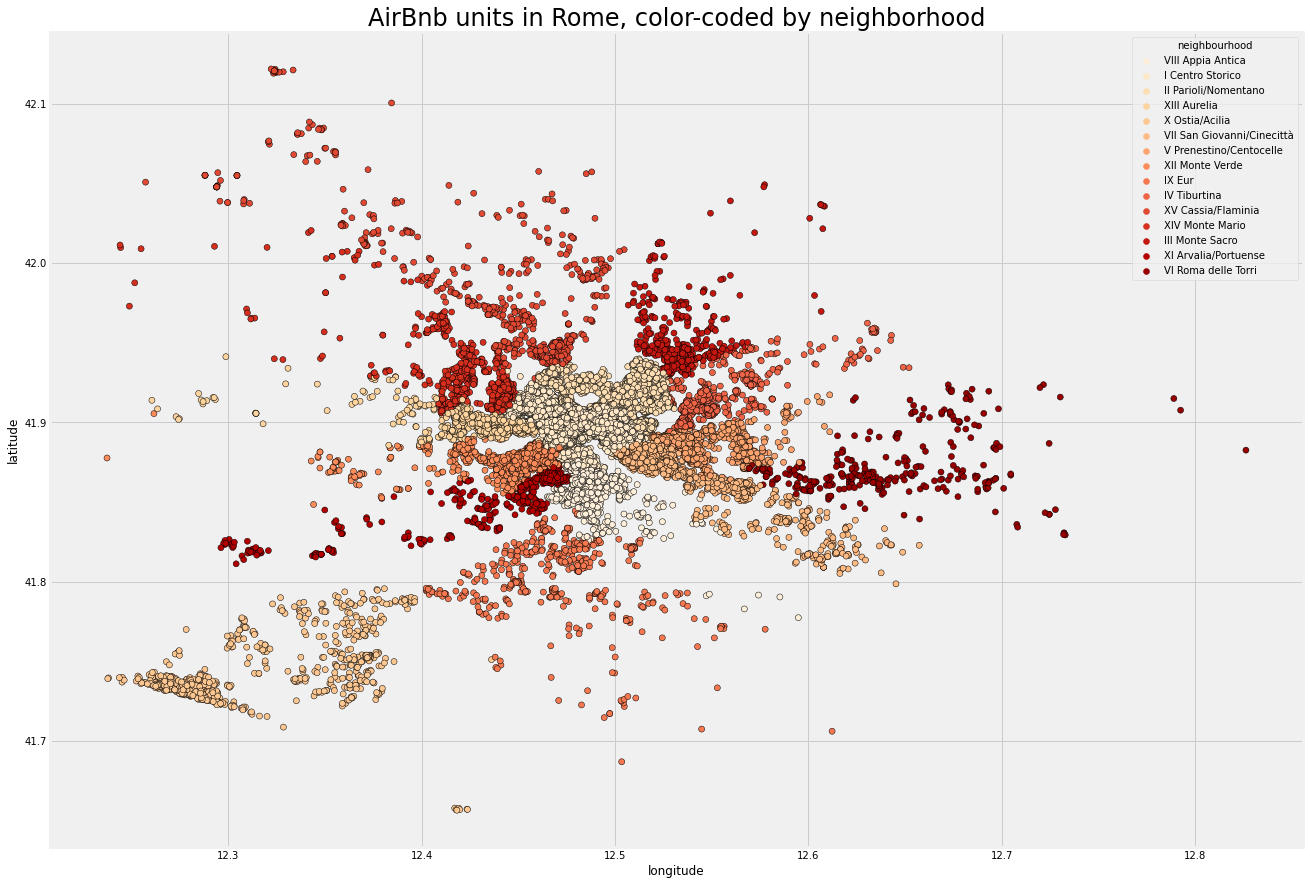

In [12]:
title = 'AirBnb units in Rome, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_rome_unique.longitude, master_df_rome_unique.latitude, hue = master_df_rome_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_rome.png')
plt.show()

## Add review data through a join

In [13]:
df_reviews = pd.concat([rome_raw_df_10_6_2021,raw_df_rome],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,26,...,4.60,4.60,4.80,5.00,4.40,4.40,f,0.0,5.0,0.0
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.888240,12.469530,Private room,86,...,4.26,4.67,4.59,4.70,4.74,4.48,f,0.0,3.0,0.0
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,100,...,4.32,4.58,4.68,4.84,4.79,4.37,f,7.0,0.0,0.0
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.896500,12.492110,Entire home/apt,90,...,4.76,4.87,4.97,4.91,4.98,4.68,f,1.0,0.0,0.0
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,63,...,4.85,4.90,4.95,5.00,4.85,4.85,f,1.0,1.0,0.0
5,14181,Beautiful apt close to the Vatican,51913,Ivan,NaN,I Centro Storico,41.913530,12.453700,Private room,187,...,4.83,4.83,4.96,4.87,4.57,4.74,f,0.0,1.0,0.0
6,15409,VATICAN SAN PIETRO 5min From Vatican,60352,Manuel,NaN,XIII Aurelia,41.896990,12.448080,Entire home/apt,100,...,4.00,5.00,4.50,5.00,4.50,4.50,f,1.0,2.0,0.0
7,16276,B&B Calisto6 great location in Rome,3280,Andrea,NaN,I Centro Storico,41.890070,12.471220,Private room,86,...,4.25,4.75,5.00,5.00,5.00,4.50,f,0.0,3.0,0.0
8,19965,*BRIGHT IN FRONT OF THE VATICAN CITY TWO BDR*,75450,Sasa,NaN,I Centro Storico,41.907300,12.453490,Entire home/apt,70,...,4.53,4.35,4.76,4.85,4.84,4.55,t,9.0,0.0,0.0
9,19967,A 5 MIN A PIEDI P.ZZA S. PIETRO 2 CAMERE LUMINOSO,75450,Sasa,NaN,I Centro Storico,41.909200,12.453440,Entire home/apt,68,...,4.16,3.88,4.78,4.74,4.81,4.22,t,9.0,0.0,0.0


## Regression

In [14]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -123.68581608597441
Coefficients:  [ 17.89120627  42.05584601  -9.18960986   0.41393953   2.49059523
 -15.06378546  16.79239997  53.58814653 -31.7734401 ]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(19777, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

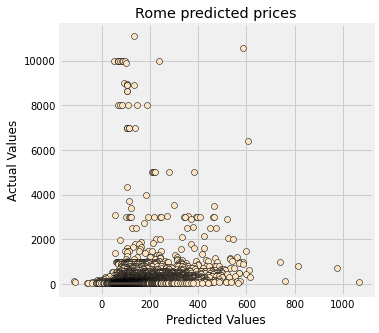

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Rome predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [19]:
df_result.index

Int64Index([16907, 17317, 21035, 21034, 21036, 19307, 19305, 19309, 24357,
            19308,
            ...
            22758, 12241, 19960, 13926, 11487, 20217, 23306, 23533,  1175,
            19824],
           dtype='int64', length=19777)

In [20]:
raw_df_rome.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20211011151830,2021-10-12,"Elif's room in cozy, clean flat.","10 min by bus you can get to Piazza Venezia or Colosseum. All shops, gym, many trendy&local restaurants and cafes walking distance. <br />30min from beaches of Ostia and Fiumicino airport by direct train. <br />5 min away from metro B line Piramide stop.<br />EATALY is 5 min walking away where you can eat and shop the most quality Italian food from 9 am to midnight.<br />There is big supermarket open 7/24m just 2 min walking.<br /><br /><b>The space</b><br />Very comfortable, clean and cozy flat in the new trendy neighborhood of Ostiense.<br /><br /><b>Guest access</b><br />You can cook and prepare your meals, do your laundry, navigate in internet in your own computer.<br /><br /><b>Other things to note</b><br />There are several excellent and very famous pasticeria near by where you can have Italian breakfast with fresh cornetto and cappuccino. <br />Eataly is open all day till midnight to eat and shop where you can get in 5 min walking. There are many other very good places that you","It used to be an industrial area until late 80s. <br />Now all the factories have became museums, cultural centers, shops, restaurants, university buildings. <br />It's next to well known Testaccio, Garbatella, Aventino, S.Saba and S.Paolo. <br />It's quite lively especially weekend nights. <br />You can have great time in the excellently located flat. <br />Capitolino Museums and Basilica di S.Paolo which is one of the four big churches of Rome is 15 min walking distance. <br />The only Roman Piramid left from Roman times is just around the corner, next to Protestant cemetery which is one of the most poetic place to visit in the city. There is lovely small museum with free entrance on the Porta San Paolo.",https://a0.muscache.com/pictures/41225252/e9553eba_original.jpg,3047,https://www.airbnb.com/users/show/3047,...,5.00,4.40,4.40,NaN,f,5,0,5,0,0.08
1,2903,https://www.airbnb.com/rooms/2903,20211011151830,2021-10-11,Stay a night in Calisto6 B&B Rome,"<b>The space</b><br />Calisto6 B&B is an Italian city style ""bed and breakfast"" in Rome offering accommodations with a warm ""bed and breakfast"" atmosphere in a centrally located, convenient location. It is the perfect place to experience daily life in a typically Roman setting. <br />The apartment is located in a circa 1400 three-story townhouse built in the architectural style of the much-loved italian renaissance style in rione Trastevere, close to the famous S. Maria in Trastevere Church and it feels the effects of all the emotions that this site arouses. <br /> <br />In Calisto6 B&B you will find a nice and refined environment personally created with great taste by the owner, thanks to his lenghty experience of architect. Even the smallest details have been taken care of with diligence. We offer charming rooms each with 12 foots ceilings and beautiful hardwood floors. All the rooms are characterized by a different style, decorated in soft color and fitted with fine parquette or ma",NaN,https://a0.muscache.com/pictures/6315103/3f4d33fa_original.jpg,3280,https://www.airbnb.com/users/show/3280,...,4.70,4.74,4.48,NaN,f,3,0,3,0,0.57
2,3079,https://www.airbnb.com/rooms/3079,20211011151830,2021-10-12,Cozy apartment (2-4)with Colisseum view,"With the view of the Colisseum from the front door and windows and within easy walking distance of the Imperial Forum the apartment is the perfect spot for spending an holiday in Rome.<br /><br /><b>The space</b><br />The apartment is located in one of Rome's most characteristic

In [21]:
df_result['id'] = df_result.index.values
df_result.shape

(19777, 4)

In [22]:
raw_df_rome.index.values
df_result.index.values

array([16907, 17317, 21035, ..., 23533,  1175, 19824])

In [23]:
df_result_merge = df_result.merge(raw_df_rome, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(25489, 77)

In [24]:
df_join = df_result.join(raw_df_rome, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4377
Length: 78, dtype: int64

In [25]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [35]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'price','Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_rome = df_print[df_print['Predicted']>0]
df_print_rome.head()

,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
16907,16907,11111,"$11,111.00",135.188285,-10975.811715,https://www.airbnb.com/rooms/34129778,41.91035,12.47446,5,I Centro Storico,4.63,4.63,4.63,4.88,5.0,5.0,4.75,8
17317,17317,10571,"$10,571.00",587.628137,-9983.371863,https://www.airbnb.com/rooms/35081594,41.90392,12.48295,16,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21035,21035,10000,"$10,000.00",51.941832,-9948.058168,https://www.airbnb.com/rooms/42947212,41.90286,12.47866,1,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21034,21034,10000,"$10,000.00",69.833038,-9930.166962,https://www.airbnb.com/rooms/42947055,41.90471,12.48053,2,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21036,21036,10000,"$10,000.00",69.833038,-9930.166962,https://www.airbnb.com/rooms/42947265,41.90462,12.47998,2,I Centro Storico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [38]:
df_print_rome['neighbourhood_cleansed'].value_counts()

I Centro Storico              12009
II Parioli/Nomentano           1308
VII San Giovanni/Cinecittà     1274
XIII Aurelia                   1193
XII Monte Verde                 915
VIII Appia Antica               463
X Ostia/Acilia                  457
V Prenestino/Centocelle         404
XIV Monte Mario                 335
XV Cassia/Flaminia              311
XI Arvalia/Portuense            271
IV Tiburtina                    245
IX Eur                          240
III Monte Sacro                 223
VI Roma delle Torri             100
Name: neighbourhood_cleansed, dtype: int64

In [39]:
df_print_rome_final = df_print_rome.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_rome_final.isna().sum()

id_x                           0
Actual                         0
price                          0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [46]:
df_rome_query = df_print_rome_final.query('number_of_reviews >11 & accommodates <=6')
df_rome_query.columns
#df_rome_query.head()

Index(['id_x', 'Actual', 'price', 'Predicted', 'Diff', 'listing_url',
       'latitude', 'longitude', 'accommodates', 'neighbourhood_cleansed',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'number_of_reviews'],
      dtype='object')

In [56]:
df_rome_query.query('accommodates<5 &review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5').sort_values(by=['Predicted'],ascending=False)




,id_x,Actual,price,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
15866,15866,53,$53.00,275.359123,222.359123,https://www.airbnb.com/rooms/32097316,41.907970,12.493510,2,I Centro Storico,4.58,4.64,4.75,4.76,4.84,4.80,4.56,55
14850,14850,126,$126.00,240.460782,114.460782,https://www.airbnb.com/rooms/29580384,41.904060,12.458300,2,I Centro Storico,5.00,4.87,4.93,5.00,5.00,4.93,4.87,15
3489,3489,209,$209.00,235.295385,26.295385,https://www.airbnb.com/rooms/5036702,41.893770,12.472280,4,I Centro Storico,4.95,4.97,4.95,4.98,4.98,4.98,4.91,64
6787,6787,91,$91.00,233.893361,142.893361,https://www.airbnb.com/rooms/11452355,41.895820,12.498650,3,I Centro Storico,4.70,4.69,4.93,4.76,4.79,4.83,4.72,30
12896,12896,80,$80.00,218.182484,138.182484,https://www.airbnb.com/rooms/24464233,41.897890,12.470010,4,I Centro Storico,4.60,4.67,4.69,4.87,4.64,4.98,4.60,45
10032,10032,59,$59.00,206.801690,147.801690,https://www.airbnb.com/rooms/18524044,41.898120,12.471190,4,I Centro Storico,4.79,4.88,4.92,4.67,4.79,5.00,4.75,24
8379,8379,500,$500.00,205.933288,-294.066712,https://www.airbnb.com/rooms/14927534,41.906580,12.481440,4,I Centro Storico,5.00,4.94,4.94,4.94,4.94,5.00,5.00,17
17334,17334,70,$70.00,195.870448,125.870448,https://www.airbnb.com/rooms/35120615,41.900020,12.501840,2,I Centro Storico,4.79,4.87,4.77,4.89,4.87,4.70,4.81,50
5120,5120,84,$84.00,192.706230,108.706230,https://www.airbnb.com/rooms/8170881,41.900310,12.476790,4,I Centro Storico,4.67,4.48,4.84,4.81,4.80,4.96,4.73,254
4689,4689,3000,"$3,000.00",191.904320,-2808.095680,https://www.airbnb.com/rooms/7121143,41.899600,12.491900,4,I Centro Storico,4.89,4.94,4.97,4.94,4.85,4.91,4.94,37


In [42]:
df_rome_query.shape

(8216, 18)

In [50]:
df_neighborhood_plot = df_print_rome_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)
df_neighborhood_plot

,neighbourhood_cleansed,Actual
0,I Centro Storico,149.818371
14,XV Cassia/Flaminia,129.353261
1,II Parioli/Nomentano,124.411265
12,XIII Aurelia,115.813778
3,IV Tiburtina,112.681818
6,VI Roma delle Torri,108.900000
13,XIV Monte Mario,106.648069
7,VII San Giovanni/Cinecittà,105.848958
4,IX Eur,103.625000
11,XII Monte Verde,100.061856


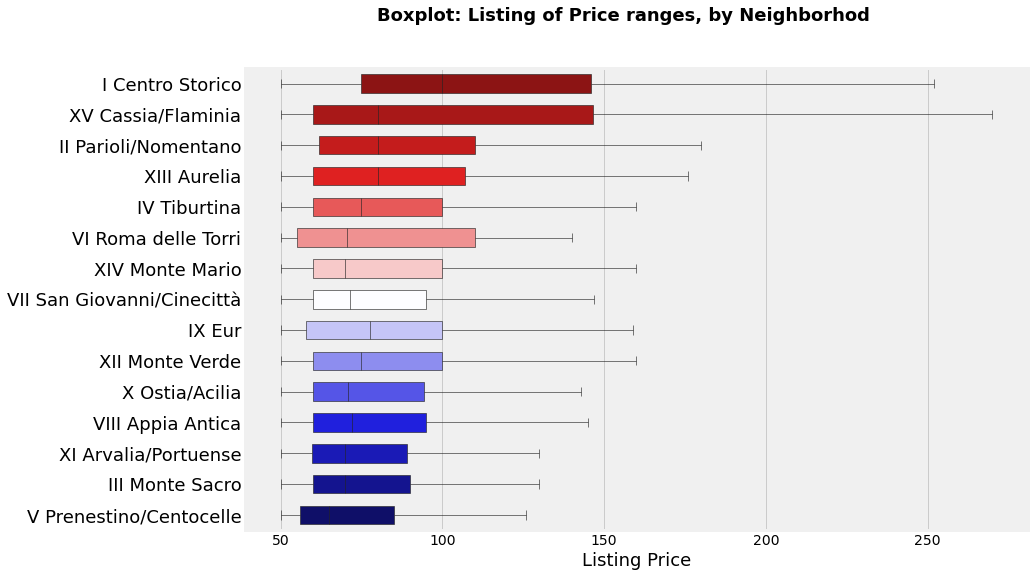

In [55]:
df_neighborhood_plot = df_print_rome_final.groupby("neighbourhood_cleansed").mean()["Actual"].reset_index().sort_values("Actual", ascending=False)

plt.figure(figsize=(4,5))
dft = df_print_rome_final[["neighbourhood_cleansed", "Actual"]].copy()
sns.boxplot(x='Actual', y='neighbourhood_cleansed', data=dft, order=df_neighborhood_plot["neighbourhood_cleansed"].values,
            showfliers = False, palette="seismic_r", linewidth=0.6, width=0.6)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Listing Price", fontsize=18)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing of Price ranges, by Neighborhod", fontweight="bold", fontsize=18)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 8.5)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

fig.savefig('rome_neighborhood_boxplot.png')

In [31]:
df_query_montmartre = df_rome_query[df_rome_query['neighbourhood_cleansed']=='Buttes-Montmartre']
df_query_montmartre = df_query_montmartre.query('review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5')
df_query_montmartre.head()

,id_x,Actual,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
37200,37200,2500,252.672043,-2247.327957,https://www.airbnb.com/rooms/40277740,48.88863,2.33468,4,Buttes-Montmartre,5.00,4.83,5.00,4.75,4.92,4.92,4.92,12
8392,8392,741,148.937252,-592.062748,https://www.airbnb.com/rooms/7479590,48.88844,2.34592,2,Buttes-Montmartre,4.57,4.70,4.65,4.68,4.74,4.90,4.66,71
4978,4978,650,311.464433,-338.535567,https://www.airbnb.com/rooms/4880464,48.89430,2.32940,5,Buttes-Montmartre,4.65,4.92,4.81,4.73,4.81,4.62,4.65,30
7546,7546,400,67.082232,-332.917768,https://www.airbnb.com/rooms/7071582,48.88660,2.33292,2,Buttes-Montmartre,4.79,4.95,4.70,4.86,4.88,4.88,4.73,67
1546,1546,399,169.328600,-229.671400,https://www.airbnb.com/rooms/1350985,48.88332,2.34252,2,Buttes-Montmartre,4.84,4.90,4.89,4.80,4.84,4.75,4.72,62


In [32]:
df_query_montmartre.sort_values(by=['Predicted'],ascending=False).head()

,id_x,Actual,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
21618,21618,261,341.954848,80.954848,https://www.airbnb.com/rooms/21807545,48.88942,2.32689,6,Buttes-Montmartre,4.84,4.89,4.86,4.98,4.96,4.82,4.66,141
35472,35472,140,339.765060,199.765060,https://www.airbnb.com/rooms/38579841,48.88929,2.34174,6,Buttes-Montmartre,4.67,4.92,4.92,4.42,4.75,5.00,4.75,12
9829,9829,200,316.293607,116.293607,https://www.airbnb.com/rooms/9028649,48.89261,2.32816,6,Buttes-Montmartre,4.91,5.00,4.96,4.96,5.00,4.91,4.77,24
4978,4978,650,311.464433,-338.535567,https://www.airbnb.com/rooms/4880464,48.89430,2.32940,5,Buttes-Montmartre,4.65,4.92,4.81,4.73,4.81,4.62,4.65,30
5593,5593,155,306.325976,151.325976,https://www.airbnb.com/rooms/5666569,48.88625,2.34939,5,Buttes-Montmartre,4.60,4.80,4.53,4.79,4.71,4.64,4.57,18
